# loading the mnist dataset

In [1]:
from scipy.io import loadmat
mnist = loadmat("/kaggle/input/mnist-original/mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]

# Importing the dependencies 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import normalize

# train_test_split

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(mnist_data,mnist_label,test_size = 0.14,random_state = 42)

In [4]:
x_train.shape

(60199, 784)

In [5]:
x_test.shape

(9801, 784)

In [6]:
x_train[0].shape

(784,)

In [7]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

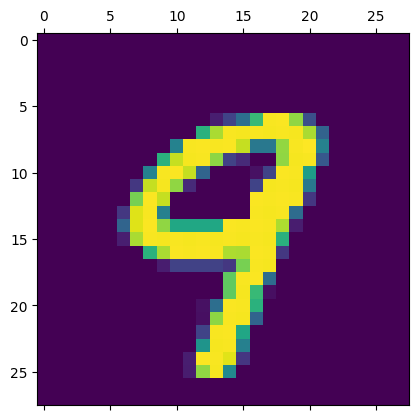

In [8]:
plt.matshow(x_train[0].reshape(28,28))

# Neural network model

In [9]:
model = Sequential([
    Dense(units = 128,activation = "relu"),
    Dense(units = 64,activation = "relu"),
    Dense(units = 10,activation = "softmax"),
])

# compilation

In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# fitting the model

In [11]:
model.fit(x_train,y_train,epochs = 50,batch_size = 32)

Epoch 1/50
1882/1882 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7842 - loss: 4.5410
Epoch 2/50
1882/1882 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9192 - loss: 0.3185
Epoch 3/50
1882/1882 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9402 - loss: 0.2269
Epoch 4/50
1882/1882 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9512 - loss: 0.1718
Epoch 5/50
1882/1882 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9571 - loss: 0.1516
Epoch 6/50
1882/1882 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9643 - loss: 0.1313
Epoch 7/50
1882/1882 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9690 - loss: 0.1096
Epoch 8/50
1882/1882 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9726 - loss: 0.1013
Epoch 9/50
1882/1882 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9748 - loss: 0.0900
Epoch 10/50
1882/1882 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9755 - loss: 0.0920
Epoch 11/50
1882/1882 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9791 - loss: 0.0800
Epoch 12/50
1882/1882 ━━━━━━━━

# evaluating the model

In [12]:
test_loss,test_accuracy = model.evaluate(x_test,y_test)
print(f"test_loss:{test_loss},test_accuracy:{test_accuracy}")

307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9692 - loss: 0.3581
test_loss:0.3732171058654785,test_accuracy:0.9705132246017456


# predictions

In [13]:
predictions = model.predict(x_test[:5])
print("predicted labels:",predictions.argmax(axis=1))
print("true labels:",y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
predicted labels: [7 8 6 5 7]
true labels: [7. 8. 6. 5. 7.]


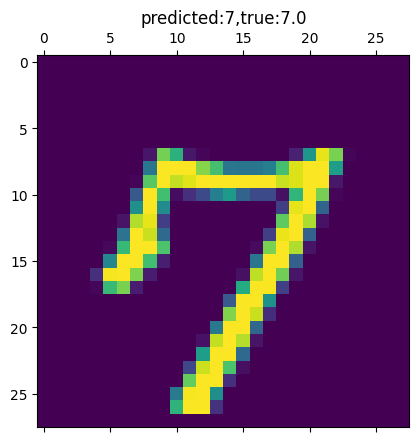

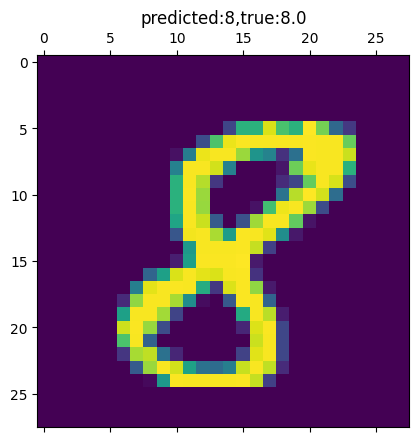

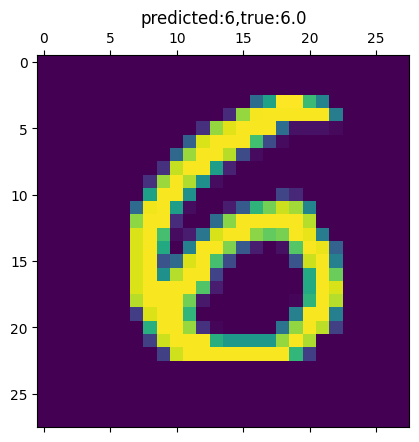

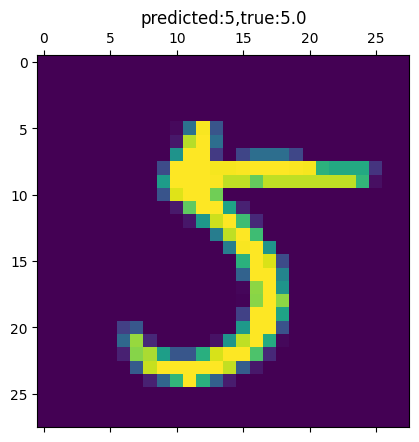

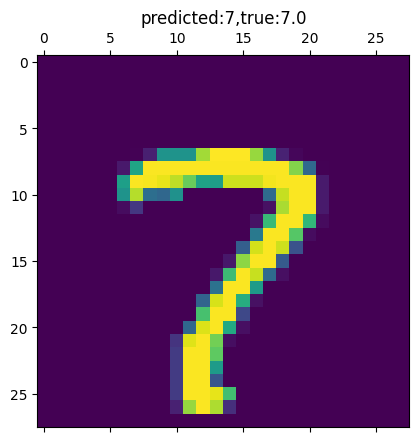

In [14]:
for i in range(5):
    plt.matshow(x_test[i].reshape(28,28))
    plt.title(f"predicted:{predictions[i].argmax(axis=0)},true:{y_test[i]}")
    plt.show()

In [15]:
model.save("Projects.h5")